<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB
Doğruluk Oranı: 0.9125
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.86      0.94      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.9

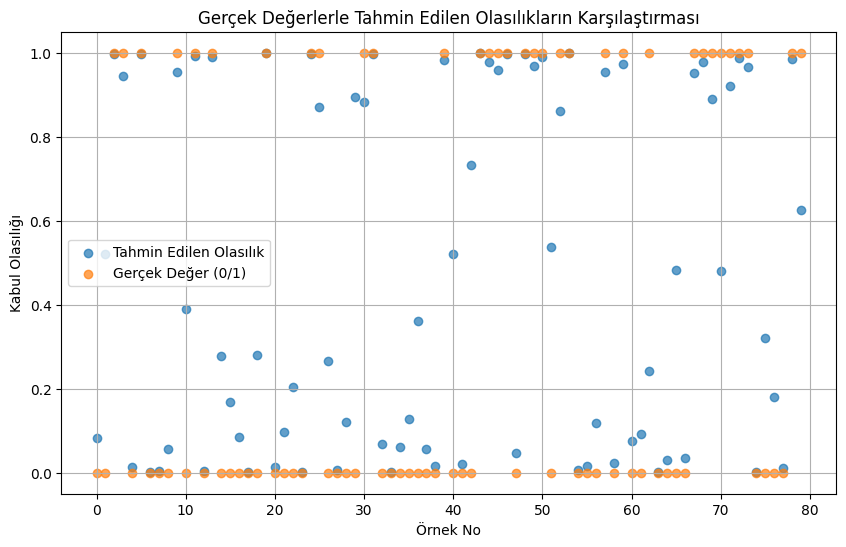

   Gerçek Değer  Tahmin Olasılığı (Kabul)  Tahmin Sınıfı
0             0                  0.082011              0
1             0                  0.520399              1
2             1                  0.997070              1
3             1                  0.945237              1
4             0                  0.013400              0
5             1                  0.996944              1
6             0                  0.002380              0
7             0                  0.002934              0
8             0                  0.056627              0
9             1                  0.953779              1
Ağırlıklar (W): [[0.71823304 0.34698431 0.30993856 0.42555718 0.25271671 1.76046183
  0.41154067]]
Bias (b): [-0.37879045]
Modelin kullandığı iterasyon sayısı: [10]


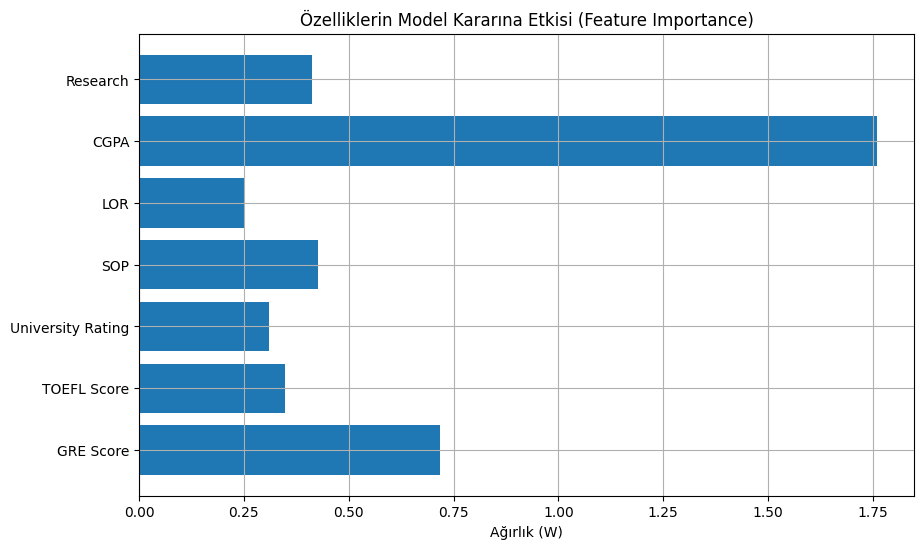

Eşik 0.7 için performans:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.94      0.91      0.92        33

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80

Eşik 0.8 için performans:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.97      0.91      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80



In [ ]:
# Gerekli kütüphaneleri içe aktar
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Uyarıları kapat
warnings.filterwarnings("ignore")
# Uyarıları gizleyerek kodun daha temiz çalışmasını sağlar.

# Veriyi yükle
file_path = "/content/drive/MyDrive/Admission_Predict.csv adlı dosyanın kopyası"
university_data = pd.read_csv(file_path, sep="," , engine="python")


university_data.head()
university_data.info()
# Hedef değişkeni 0 ve 1 olarak sınıflandıralım
university_data["Chance of Admit Binary"] = (university_data["Chance of Admit "] >= 0.75).astype(int)

X = university_data[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]]
y = university_data["Chance of Admit Binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Ölçekleyici nesnesi oluştur
scaler = StandardScaler()

# Sadece X'i ölçeklendiyoruz, y'ye dokunmuyoruz
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli oluştur
log_model = LogisticRegression()

# Eğit (fit)
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

y_proba = log_model.predict_proba(X_test_scaled)
accept_probs = y_proba[:, 1]  # Sadece 1 (kabul) sınıfının olasılıkları

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), accept_probs, label="Tahmin Edilen Olasılık", alpha=0.7)
plt.scatter(range(len(y_test)), y_test, label="Gerçek Değer (0/1)", alpha=0.7)
plt.xlabel("Örnek No")
plt.ylabel("Kabul Olasılığı")
plt.legend()
plt.title("Gerçek Değerlerle Tahmin Edilen Olasılıkların Karşılaştırması")
plt.grid(True)
plt.show()



comparison_df = pd.DataFrame({
    "Gerçek Değer": y_test.values[:10],
    "Tahmin Olasılığı (Kabul)": accept_probs[:10],
    "Tahmin Sınıfı": log_model.predict(X_test_scaled)[:10]
})

print(comparison_df)

# Ağırlıkları (weights) yazdır
print("Ağırlıklar (W):", log_model.coef_)

# Bias (sabit terim) yazdır
print("Bias (b):", log_model.intercept_)


LogisticRegression(
    tol=1e-4,  # yani 0.0001 tolerans
    max_iter=100,  # maksimum 100 iterasyon yapabilir
    solver='lbfgs'  # optimizasyon algoritması
)

print("Modelin kullandığı iterasyon sayısı:", log_model.n_iter_)

features = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"]
weights = log_model.coef_[0]

plt.figure(figsize=(10, 6))
plt.barh(features, weights)
plt.xlabel("Ağırlık (W)")
plt.title("Özelliklerin Model Kararına Etkisi (Feature Importance)")
plt.grid(True)
plt.show()

y_probs = log_model.predict_proba(X_test_scaled)[:, 1]
y_pred_07 = (y_probs >= 0.7).astype(int)
y_pred_08 = (y_probs >= 0.8).astype(int)

print("Eşik 0.7 için performans:")
print(classification_report(y_test, y_pred_07))

print("Eşik 0.8 için performans:")
print(classification_report(y_test, y_pred_08))

#Daha fazla özellik eklemek	Mesela adayın staj deneyimi, uluslararası sertifikaları, sosyal aktiviteleri gibi.
